Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64

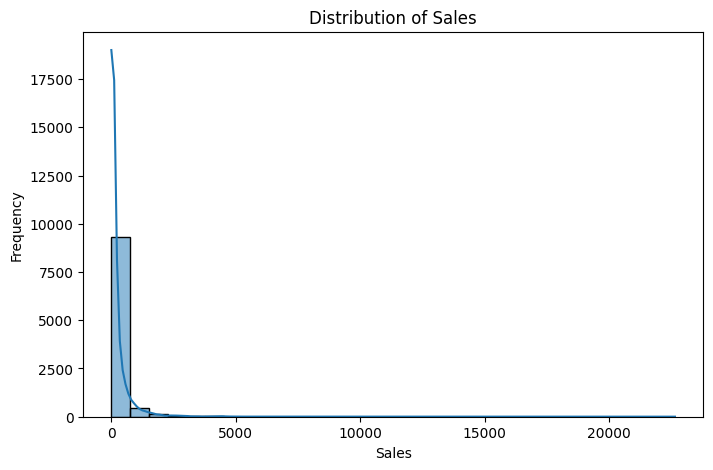

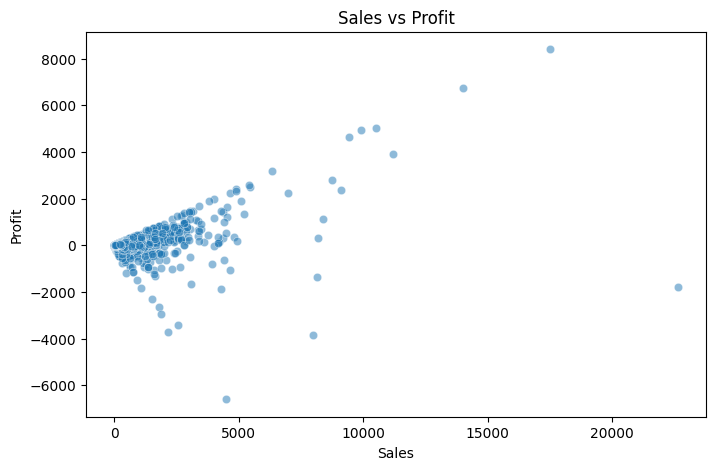

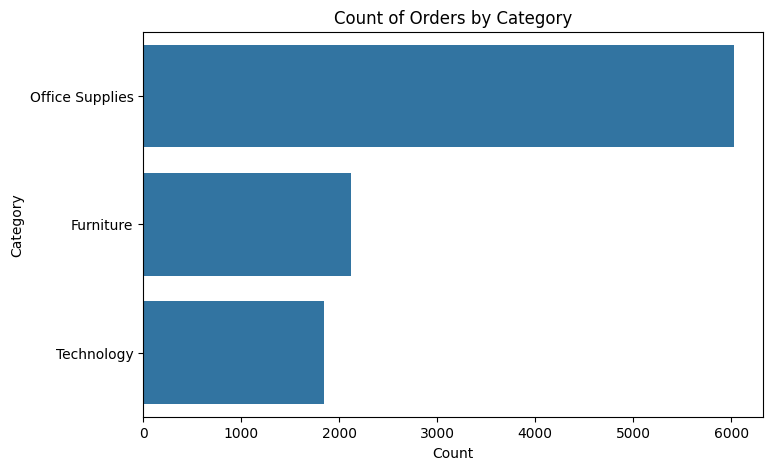

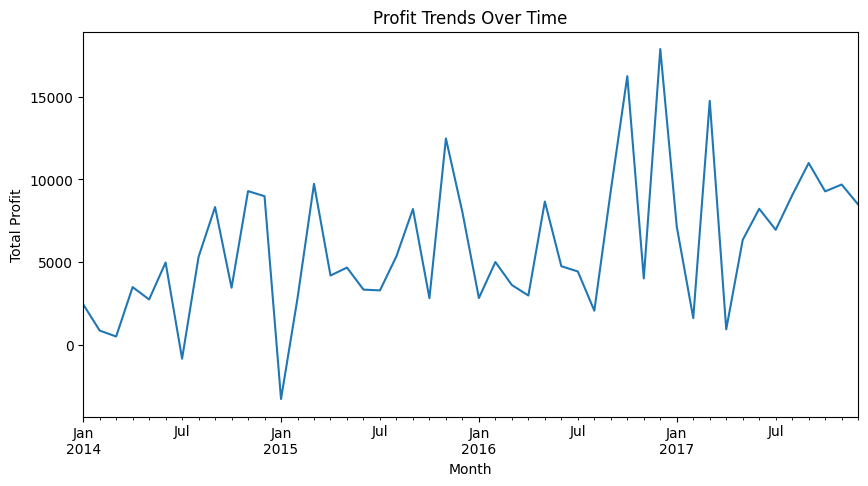

ModuleNotFoundError: No module named 'ace_tools'

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/Users/chait/Sample - Superstore.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display basic information about the dataset
print("Dataset Info:")
df.info()
print("\nSummary Statistics:")
print(df.describe())

# Handle missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])

# Drop rows with missing values (if applicable)
df_cleaned = df.dropna()

# Remove duplicates
df_cleaned = df_cleaned.drop_duplicates()

# Standardizing scales (Currency conversions, if needed)
# Assuming 'Sales' and 'Profit' columns are in different currencies (hypothetically)
# Convert to a single currency if conversion rates are known (not done here due to lack of rates)

# Summary statistics after cleaning
print("\nSummary Statistics After Cleaning:")
print(df_cleaned.describe())

# Exploratory Data Analysis (EDA)
# Distribution of Sales
plt.figure(figsize=(8,5))
sns.histplot(df_cleaned['Sales'], bins=30, kde=True)
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

# Sales vs Profit Scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_cleaned['Sales'], y=df_cleaned['Profit'], alpha=0.5)
plt.title("Sales vs Profit")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.show()

# Count of Orders by Category
plt.figure(figsize=(8,5))
sns.countplot(y=df_cleaned['Category'], order=df_cleaned['Category'].value_counts().index)
plt.title("Count of Orders by Category")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

# Profit Trends over Time
if 'Order Date' in df_cleaned.columns:
    df_cleaned['Order Date'] = pd.to_datetime(df_cleaned['Order Date'])
    df_cleaned.groupby(df_cleaned['Order Date'].dt.to_period("M"))['Profit'].sum().plot(figsize=(10,5), title="Profit Trends Over Time")
    plt.xlabel("Month")
    plt.ylabel("Total Profit")
    plt.show()

# Display cleaned dataset
import ace_tools as tools
tools.display_dataframe_to_user(name="Cleaned Superstore Data", dataframe=df_cleaned)
